In [1]:
# 
# CORL 2019, 3RD ANNUAL CONFERENCE ON ROBOT LEARNING  
# Conference :  https://www.robot-learning.org/ 
# Submission : https://cmt3.research.microsoft.com/CoRL2019/Submission/
# Paper submission deadline: July 7, 2019;  23:59 Pacific Time (UTC-7)
# Paper acceptance notifications: September 7, 2019
# Camera ready papers due:  October 7, 2019
# CoRL 2019 Conference : 30.Oct ~1.Nov, 2019, in Osaka, Japan.
# 
# Title : Multivariate Time Series Forecasting for Remaining Useful Life 
#        of Turbofan Engine using Deep Stacked Residual CNN and LSTM Neural Networks
# Authors : 
# Kwangsuk Lee (Yonsei University) 
# Jae-Kyeong Kin (KERI) 
# Chang Woo Hong (Yonsei University) 
# Tae-Eung Sung (Yonsei University) 
# Kyeon Hur (Yonsei University) 
# Hagbae Kim (Yonsei University) 
# 
# 2019.06.29.SAT. 
import keras  

Using TensorFlow backend.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation

from keras.optimizers import Adam, Adamax, Nadam, RMSprop, SGD  
# https://keras.io/optimizers/

from keijzer import *  # New  --- keijzer.py  # conda install -c conda-forge tqdm 
%matplotlib inline

In [6]:
from pykalman import KalmanFilter  # conda install -c conda-forge pykalman 

title = '48-4d_corr_Adam0.0001_EarlyP20_'

In [7]:
# read training data 
# train_df = pd.read_csv('PM_train_01.txt', sep=" ", header=None)

train_df = pd.read_csv('PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [8]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
train_df.columns
cols = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [10]:
train_df.columns[2]

'setting1'

In [11]:
for cols in train_df.columns:
    if cols == 'id':
        continue;
    if cols == 'cycle':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = train_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(train_df[cols].values)
        train_df[cols] = state_means.flatten()

setting1
setting2
setting3
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21


In [12]:
# read test data
#test_df = pd.read_csv('PM_test_01.txt', sep=" ", header=None)
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [13]:
for cols in test_df.columns:
    if cols == 'id':
        continue;
    if cols == 'cycle':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = test_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(test_df[cols].values)
        test_df[cols] = state_means.flatten()

setting1
setting2
setting3
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21


In [14]:
# read ground truth data
# truth_df = pd.read_csv('PM_truth_01.txt', sep=" ", header=None)
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

In [15]:
train_df = train_df.sort_values(['id','cycle'])
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,521.660000,2388.020000,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,521.869404,2388.036887,8136.211854,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,522.011470,2388.035110,8135.442471,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,522.190824,2388.044599,8135.101643,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,522.190674,2388.043765,8134.865724,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831


In [16]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,2388.020000,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,191
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,2388.036887,8136.211854,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554,190
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,2388.035110,8135.442471,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853,189
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,2388.044599,8135.101643,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156,188
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,2388.043765,8134.865724,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831,187


In [17]:
# generate label columns for training data
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,191,0,0
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554,190,0,0
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853,189,0,0
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156,188,0,0
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831,187,0,0


In [18]:
# MinMax normalization
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

C:\Users\USER\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.368542,0.000000,0.0,0.0,0.000000,0.349894,0.185846,0.0,...,0.0,0.184954,0.0,0.0,0.938255,0.901462,191,0,0,0.00000
1,1,2,0.606362,0.045503,0.0,0.0,0.058599,0.381941,0.211315,0.0,...,0.0,0.184954,0.0,0.0,0.907757,0.905421,190,0,0,0.00277
2,1,3,0.293440,0.277092,0.0,0.0,0.115377,0.353925,0.232320,0.0,...,0.0,0.092264,0.0,0.0,0.872911,0.855227,189,0,0,0.00554
3,1,4,0.389455,0.332429,0.0,0.0,0.149888,0.287703,0.230467,0.0,...,0.0,0.111856,0.0,0.0,0.829464,0.840712,188,0,0,0.00831
4,1,5,0.326762,0.321014,0.0,0.0,0.175131,0.243408,0.252620,0.0,...,0.0,0.157660,0.0,0.0,0.805538,0.844981,187,0,0,0.01108


In [19]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.162801,0.121627,0.161653,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.194081,0.152988,0.100639,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.186010,0.152644,0.189200,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.194155,0.156341,0.162675,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.188472,0.154822,0.159729,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108


In [20]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [21]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.121627,0.161653,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000,142
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.152988,0.100639,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277,141
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.152644,0.189200,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554,140
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.156341,0.162675,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831,139
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.154822,0.159729,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108,138


In [22]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,label1,label2
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000,142,0,0
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277,141,0,0
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554,140,0,0
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831,139,0,0
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108,138,0,0


In [23]:
train_df.drop(['label1','label2'],axis=1,inplace=True)
test_df.drop(['label1','label2'],axis=1,inplace=True)

In [24]:
train_df.shape

(20631, 28)

In [25]:
test_df.shape

(13096, 28)

In [26]:
# pick a large window size of 50 cycles

# sequence_length = 50   # Original 
sequence_length = 100


In [27]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = test_df[test_df['id'] == 3]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

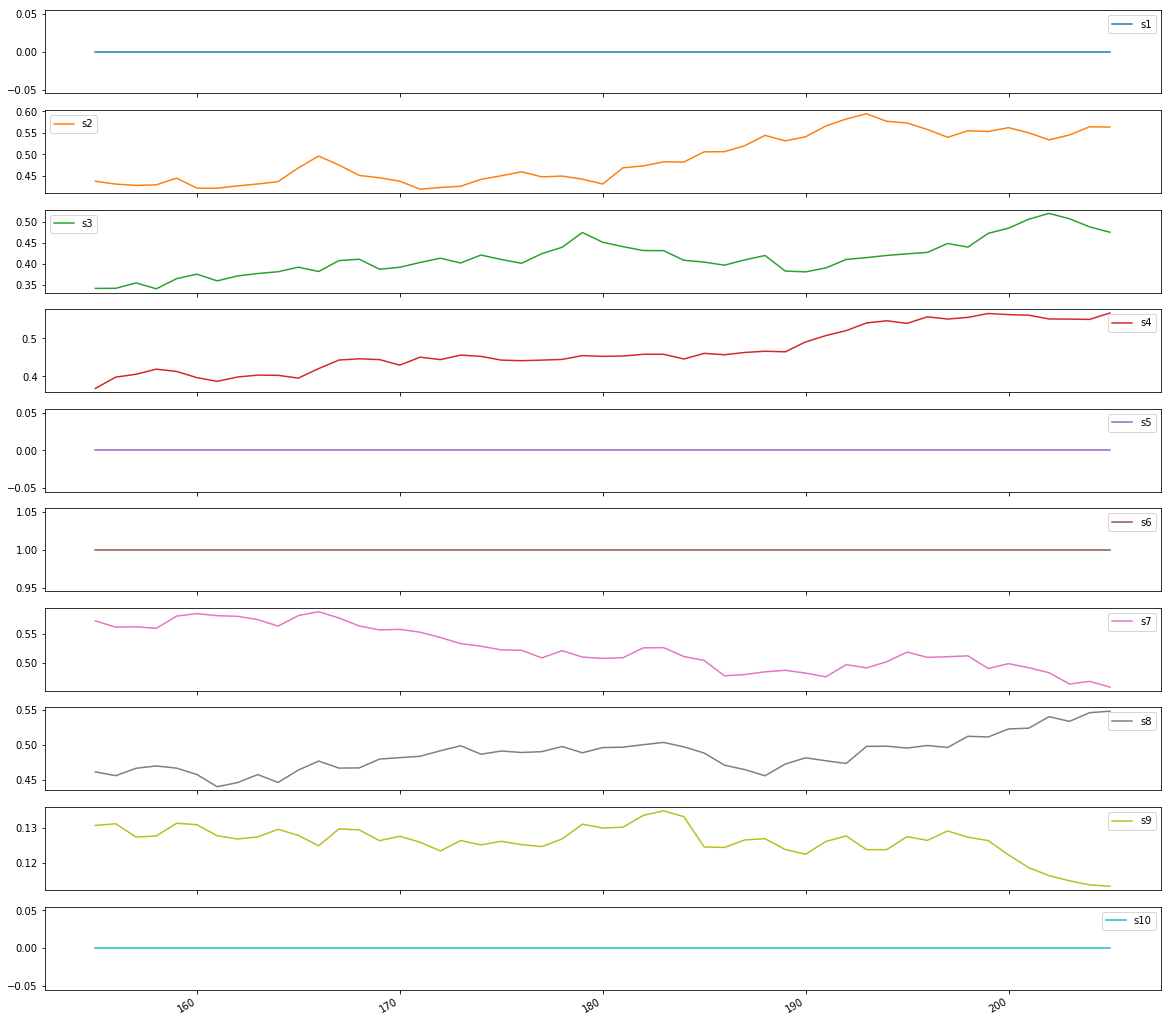

In [28]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))

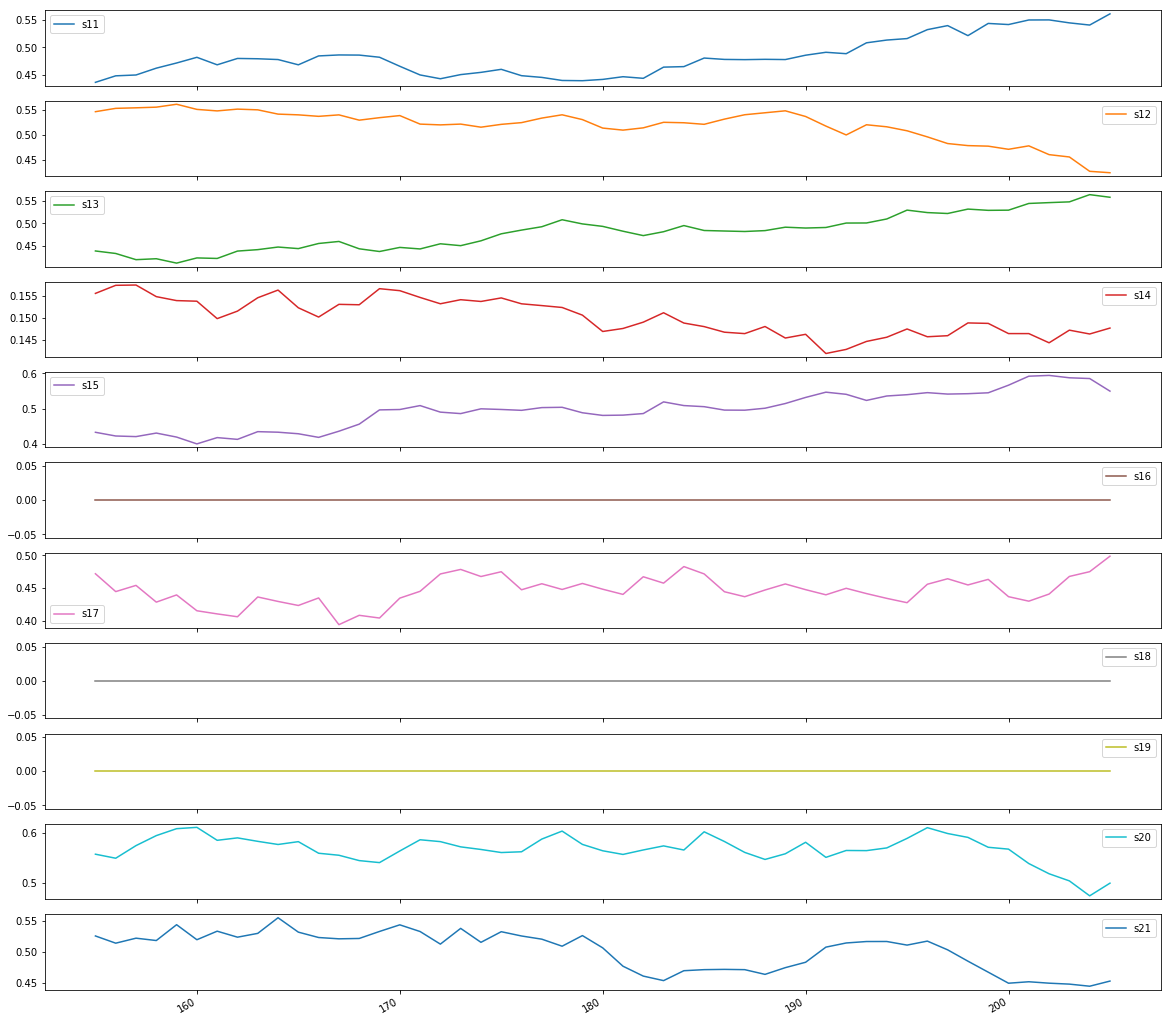

In [29]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

C:\Users\USER\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Saving heatmap


<Figure size 432x288 with 0 Axes>

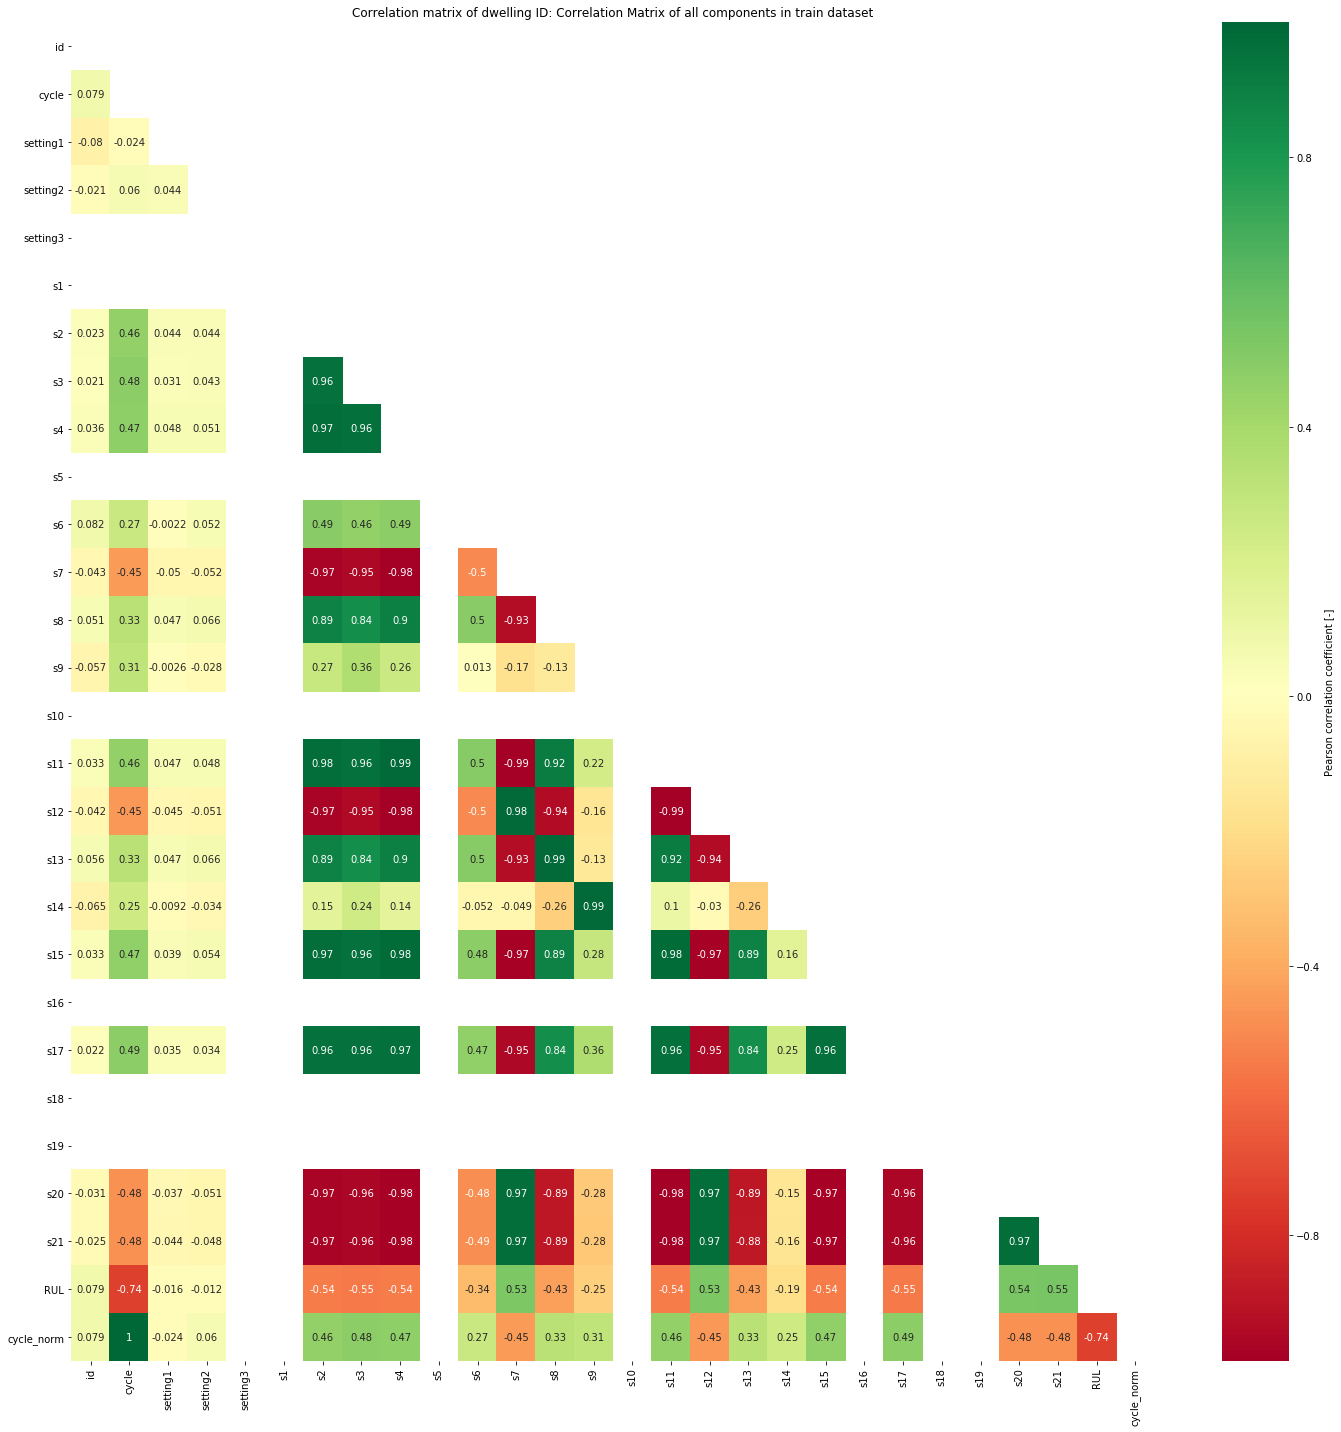

In [30]:
# 2019.6.9.일.22시 
# from keijzer import *     # (tensorflow-gpu) C:\Users\USER>conda install -c conda-forge tqdm
# 'Correlation Matrix of all components combined'
fig = create_corr_matrix(train_df, 'Correlation Matrix of all components in train dataset', True, size=(20,20))
fig.savefig(title+'corr_mat_TRAIN.png')

C:\Users\USER\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Saving heatmap


<Figure size 432x288 with 0 Axes>

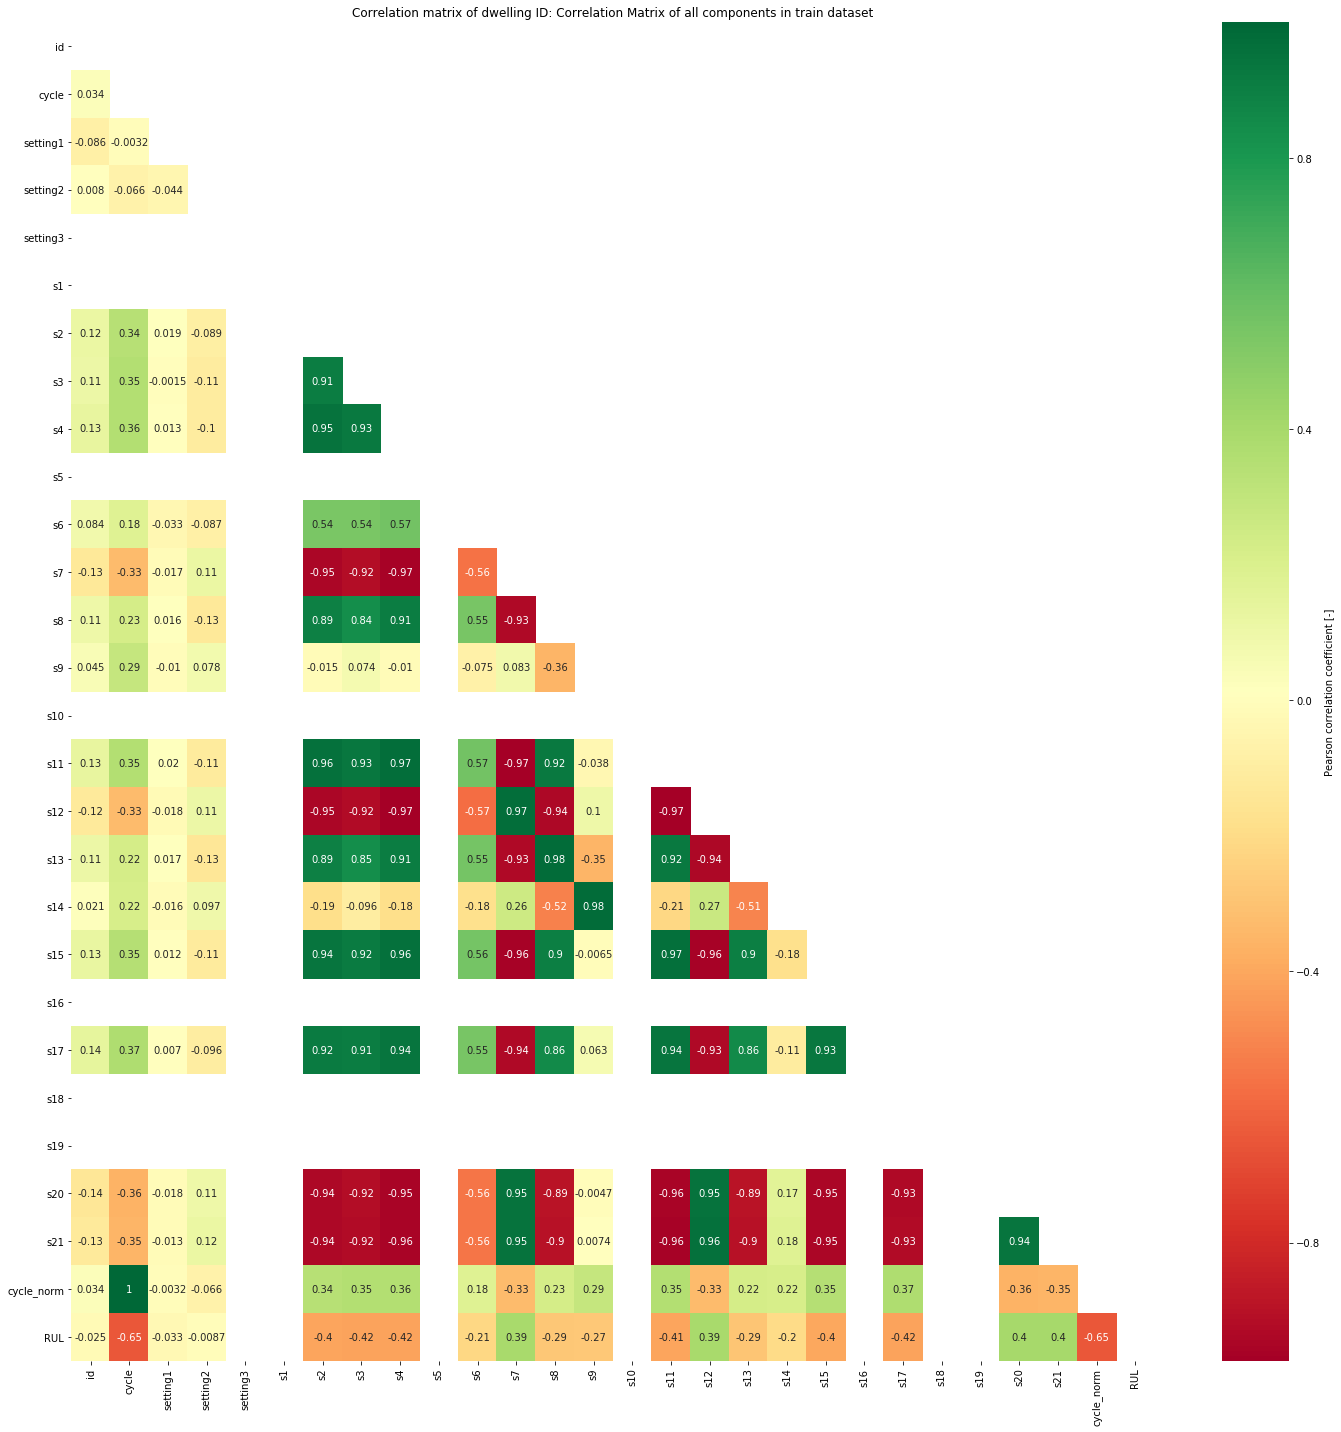

In [31]:
fig = create_corr_matrix(test_df, 'Correlation Matrix of all components in train dataset', True, size=(20,20))
fig.savefig(title+'corr_mat_test.png')

In [32]:
# df3 ...18... Sesor 15, id, RUL, cycle_norm, and delete sensor 6 (s1, s5, s10, s16, s18, s19) 
train_df3 = train_df[['id', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 
                      's13', 's14', 's15', 's17', 's20', 's21', 'cycle_norm', 'RUL']] 

In [33]:
train_df3.shape  # train_df3.columns, train_df3.head(), train_df3.info(), train_df3.describe() 
                 # 28 -6(sensors) -3(setting1,2,3) -1(cycle) = 18

(20631, 18)

In [34]:
# df3 ...18... Sesor 15, id, RUL, cycle_norm, and delete sensor 6 (s1, s5, s10, s16, s18, s19) 
test_df3 = test_df[['id', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12',
                    's13', 's14', 's15', 's17', 's20', 's21', 'cycle_norm', 'RUL']] 

In [35]:
test_df3.shape   # train_df3.columns, train_df3.head(), train_df3.info(), train_df3.describe() 

(13096, 18)

### Reshape 3D for input shape to neural networks(NNs)

In [36]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]      ### - seq_length == - timestep
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [37]:
# pick the feature columns 
#sensor_cols = ['s' + str(i) for i in range(1,22)]

sensor_cols = ['s' + str(i) for i in range(1,22)]  
print(sensor_cols) # ['s1', 's2', 's3', ..., 's19', 's21'] 

# delete sensor 6 (s1, s5, s10, s16, s18, s19), 2019.06.23.SUN. ~ 06.25.TUE. 
sensor_cols.remove('s1')
sensor_cols.remove('s5')
sensor_cols.remove('s10')
sensor_cols.remove('s16')
sensor_cols.remove('s18')
sensor_cols.remove('s19')
print(sensor_cols) # -6 s == -6 sensor(s), total 15 Sensors

# sensor_cols = ['s' + str(i) for i in range(1,22) if i=1 or i=5 or i=10 or i=16 or i=18 or i=19 continue]  # -6 s == -6 sensor(s), total 15 Sensors
# python for nested if statement on one line

#sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols = ['cycle_norm']
sequence_cols.extend(sensor_cols)  # total 15 Sensors + 1 of cycle_norm = 16
print(sensor_cols)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']


In [38]:
# generator for the sequences

####### call of gen_sequence( , , ) 
seq_gen = (list(gen_sequence(train_df3[train_df3['id']==id], sequence_length, sequence_cols)) # train_df -> train_df3
           for id in train_df3['id'].unique())   # train_df -> train_df3

In [39]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

seq_array.shape # old, (10631, 100, 25), 25cols ---> 16cols, 2019.06.23.SUN. ~ 06.25.TUE. 
                # total 15 Sensors + 1 of cycle_norm = 16

(10631, 100, 16)

In [40]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [41]:
# generate labels,  fitting to RUL

####### call of gen_label( , , ) 
label_gen = [gen_labels(train_df3[train_df3['id']==id], sequence_length, ['RUL']) # train_df -> train_df3
             for id in train_df3['id'].unique()]                                 # train_df -> train_df3
label_array = np.concatenate(label_gen).astype(np.float32)

label_array.shape  # old, (10631, 1)

(10631, 1)

### NNs Modeling with Input(shape=(sequence_length, nb_features)) 

In [42]:
#from keras.layers import Bidirectional
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout
from keras.layers import LSTM, Bidirectional 
from keras.layers.convolutional import Conv1D

In [43]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

"""model = Sequential()
# model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(sequence_length, nb_features)))
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.4))

model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.4))

model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))

model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])
"""

# sequence_length = 50   # Original 
# sequence_length = 100  # New timesteps 

visible1 = Input(shape=(sequence_length, nb_features))    # 100, 16,  100 타임스텝, 16 피처 

conv_11 = Conv1D(filters=128, kernel_size=1, strides=1, activation='relu')(visible1)   # 200 
conv_11_out = Dropout(0.5)(conv_11)

conv_12 = Conv1D(filters=16, kernel_size=1, strides=1, activation='relu')(conv_11_out)  # 25
conv_12_out = Dropout(0.5)(conv_12)

residual_1 = keras.layers.Add()([visible1, conv_12_out])   #  100, 16  <-- 50, 25

ls11 = (LSTM(128, return_sequences=True))(residual_1)   # 200
ls11_out = Dropout(0.5)(ls11)  # Dropout 0.2 -> 0.5 

ls12 = (LSTM(16, return_sequences=True))(ls11_out)      # 25    
ls12_out = Dropout(0.5)(ls12)

residual_2 = keras.layers.Add()([residual_1, ls12_out])   #  100, 16  <-- 50, 25
    
bi11 = (Bidirectional(LSTM(128, return_sequences=True)))(residual_2) # 200 
bi11_out = Dropout(0.5)(bi11)

bi12 = (Bidirectional(LSTM(256)))(bi11_out)              # 400,   Final LSTM, do not return sequence
bi12_out = Dropout(0.5)(bi12)

out1 = Dense(units=nb_out, activation='relu')(bi12_out)    # Dense(1, ), nb_out = 1

model = Model(inputs=[visible1], outputs=[out1]) # from keras.models import Model


#model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])
#model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse', 'mae', 'mape']) 

# model.compile(loss='mean_squared_error', optimizer=Adamax(), metrics=['mse', 'mae', 'mape']) 

#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape']) 
#model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse', 'mae', 'mape']) 

# default keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# lr=0.001 -> 0.0001 
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['mse', 'mae', 'mape']) 

# from keras.optimizers import Adam, Adamax, Nadam 

In [44]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 16)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 128)     2176        input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 100, 128)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 100, 16)      2064        dropout_1[0][0]                  
__________________________________________________________________________________________________
dropout_2 

In [45]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = 'predictive_regression_kalhman'
print(STAMP)

early_stopping =EarlyStopping(monitor='val_loss', patience=20)  # 15 -> 20

bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

predictive_regression_kalhman


In [46]:
%%time
# fit the network
hist = model.fit(seq_array, label_array, epochs=1000, batch_size=200, 
                 validation_split=0.05, verbose=1,callbacks=[early_stopping, model_checkpoint])

Train on 10099 samples, validate on 532 samples
Epoch 1/1000
10099/10099 [==============================] - 39s 4ms/step - loss: 5270.6303 - mean_squared_error: 5270.6303 - mean_absolute_error: 55.8801 - mean_absolute_percentage_error: 77022516.1141 - val_loss: 3912.0621 - val_mean_squared_error: 3912.0621 - val_mean_absolute_error: 46.2099 - val_mean_absolute_percentage_error: 184192624.2406
Epoch 2/1000
10099/10099 [==============================] - 33s 3ms/step - loss: 3454.1647 - mean_squared_error: 3454.1647 - mean_absolute_error: 42.5824 - mean_absolute_percentage_error: 259168939.0638 - val_loss: 2948.2504 - val_mean_squared_error: 2948.2504 - val_mean_absolute_error: 39.5089 - val_mean_absolute_percentage_error: 310771296.9624
Epoch 3/1000
10099/10099 [==============================] - 32s 3ms/step - loss: 3006.7950 - mean_squared_error: 3006.7950 - mean_absolute_error: 39.6688 - mean_absolute_percentage_error: 325470106.8544 - val_loss: 2768.4589 - val_mean_squared_error: 2768

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])


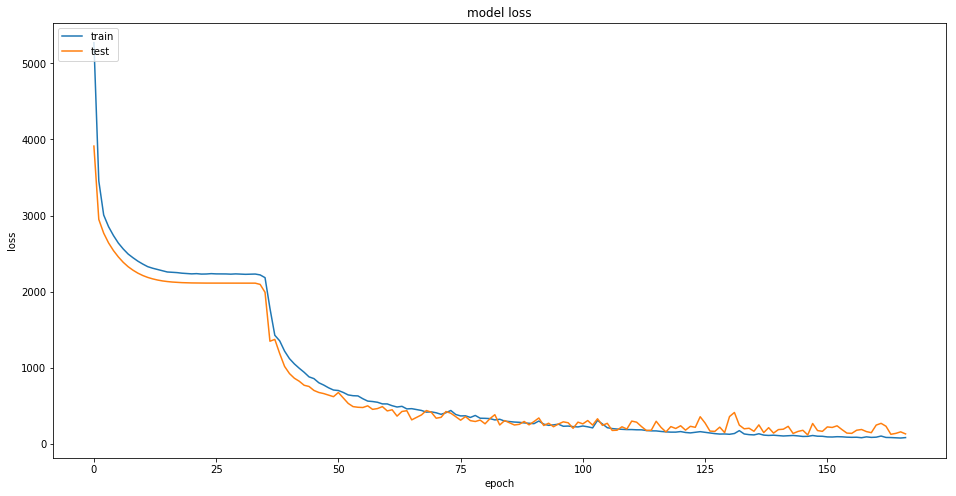

In [59]:
import matplotlib.pyplot as plt

#plots
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
#plt.plot(hist.history['acc'])
#plt.plot(hist.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

# summarize history for loss
plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(title+'_test_val_test_img.png') 
plt.show()

In [60]:
model.load_weights(bst_model_path)

In [61]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Score: {}'.format(scores[1]))

10631/10631 [==============================] - 15s 1ms/step
Score: 77.00596355183106


In [62]:
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(70, 100, 16)

In [63]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [64]:
label_array_test_last = test_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(70, 1)

In [65]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(70, 100, 16)
(70, 1)


In [66]:
# test metrics
import math
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (scores_test[0], math.sqrt(scores_test[0])))

70/70 [==============================] - 1s 10ms/step
Test Score: 128.00 MSE (11.31 RMSE)


In [67]:
pred = model.predict(seq_array_test_last, verbose=1)
pred

70/70 [==============================] - 1s 10ms/step


array([[ 70.27362  ],
       [ 58.554665 ],
       [106.54234  ],
       [ 96.945946 ],
       [108.9179   ],
       [ 84.80558  ],
       [107.2741   ],
       [ 94.145065 ],
       [ 84.84799  ],
       [ 40.077385 ],
       [ 31.036001 ],
       [ 76.557175 ],
       [ 10.93862  ],
       [ 69.8325   ],
       [108.79394  ],
       [ 13.99768  ],
       [ 63.742737 ],
       [ 95.54539  ],
       [ 78.89519  ],
       [ 73.9955   ],
       [  3.444179 ],
       [ 37.830917 ],
       [  3.3104773],
       [  4.9223423],
       [ 20.642017 ],
       [ 18.581818 ],
       [ 62.335682 ],
       [ 25.751562 ],
       [ 16.132826 ],
       [  5.584916 ],
       [ 71.54895  ],
       [104.7998   ],
       [ 34.89477  ],
       [ 28.626835 ],
       [116.69014  ],
       [ 25.679228 ],
       [ 22.684582 ],
       [ 97.362785 ],
       [105.182335 ],
       [ 10.321185 ],
       [ 84.93695  ],
       [ 28.23002  ],
       [106.51398  ],
       [ 14.980898 ],
       [ 46.48661  ],
       [ 6

In [68]:
diff = []
ratio = []
pred = model.predict(seq_array_test_last)
for u in range(len(label_array_test_last)):
    pr = pred[u][0]
    ratio.append((label_array_test_last[u] / pr) - 1)
    diff.append(abs(label_array_test_last[u] - pr))

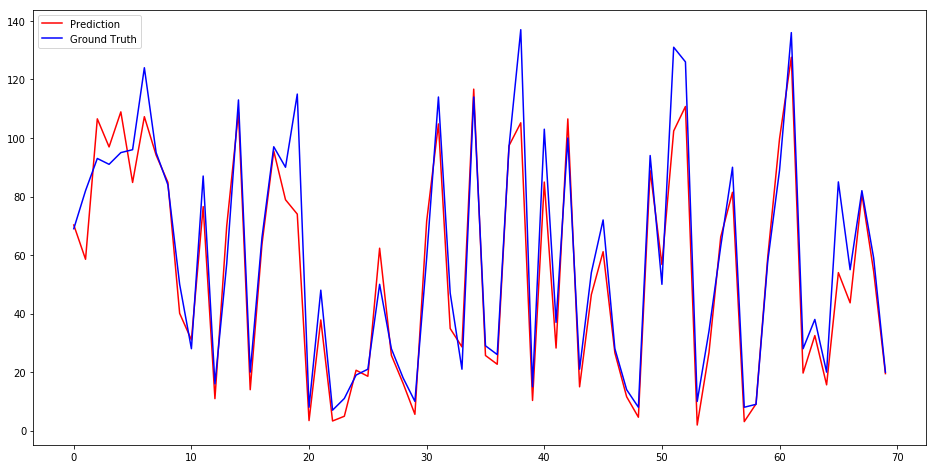

In [69]:
import matplotlib.pyplot as plt2

plt2.figure(figsize=(16,8)) 
plt2.plot(pred, color='red', linestyle='--', label='Prediction')
plt2.plot(label_array_test_last, color='blue', label='Ground Truth')
plt2.legend(loc='upper left')

plt2.suptitle('Test of RUL Prediction', fontsize=22)
plt2.xlabel('Numbers of Engine ID', fontsize=18)
plt2.ylabel('Cycle Time of RUL(Remaining Useful Life)', fontsize=18)

plt2.savefig(title+'_prediction_img.png') 
plt2.show() # linestyles = ['-.', '--',  ':']v

In [72]:
error = pd.DataFrame((label_array_test_last - pred),columns=['error'])
error.describe()

,error
count,70.000000
mean,4.821213
std,10.309070
min,-13.917900
25%,-0.306161
50%,4.378423
75%,8.716527
max,41.004501


In [73]:
# end of code

AttributeError: 'numpy.ndarray' object has no attribute 'index'

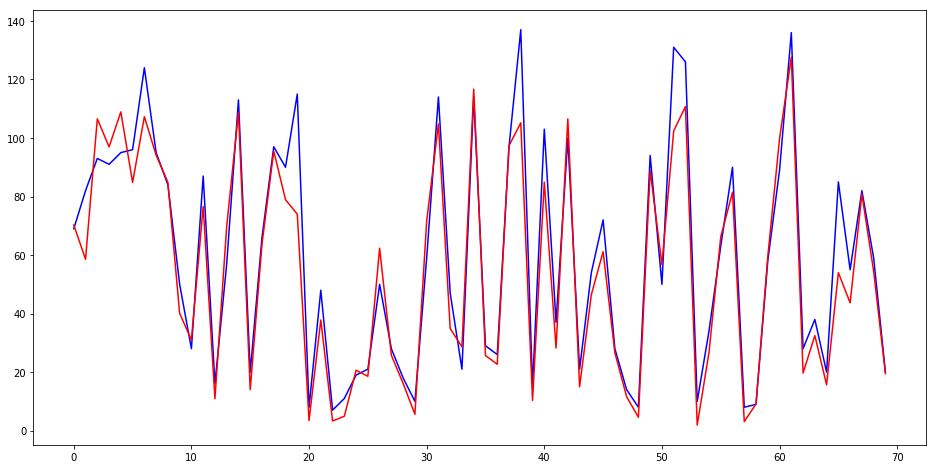

In [74]:
#import matplotlib.pyplot as plt2

plt2.figure(figsize=(16,8)) 

plt2.plot(label_array_test_last, color='blue', label='Ground Truth')
plt2.plot(pred, color='red', label='Prediction')

plt2.fill_between(pred.index, pred.iloc[:, 0], pred.iloc[:, 1], color='k', alpha=.25)

plt2.legend(loc='upper left')

plt2.suptitle('Test of RUL Prediction', fontsize=22)
plt2.xlabel('Numbers of Engine ID', fontsize=18)
plt2.ylabel('Cycle Time of RUL(Remaining Useful Life)', fontsize=18)

plt2.savefig(title+'_prediction_img3.png') 
plt2.show()

# plt2.fill_between(pred.index, ... Error: 'numpy.ndarray' object has no attribute 'index'